In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import datetime
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import pickle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-smoking/y_test.csv
/kaggle/input/dataset-smoking/x_test.csv
/kaggle/input/dataset-smoking/y_train.csv
/kaggle/input/dataset-smoking/x_train.csv
/kaggle/input/smoking-dataset/smoking.csv
/kaggle/input/rfc-model/rf_model10.pickle
/kaggle/input/rfc-model/rf_modelsmote10.pickle


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [56]:
df = pd.read_csv('../input/smoking-dataset/smoking.csv')


In [3]:
df.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

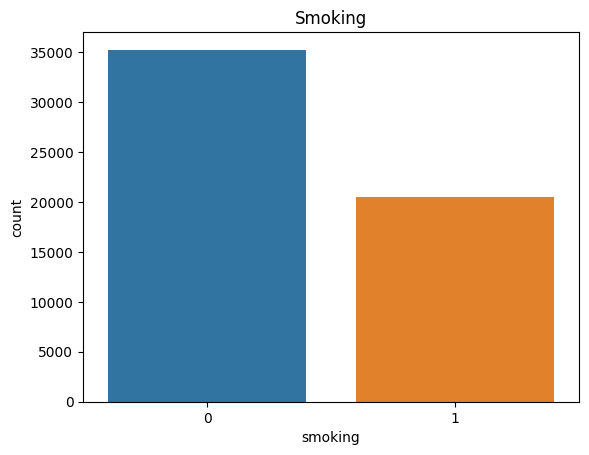

In [44]:
#VISUALISASI
# Count plot for the 'diabetes' variable
sns.countplot(x='smoking', data=df)
plt.title('Smoking')
plt.show()

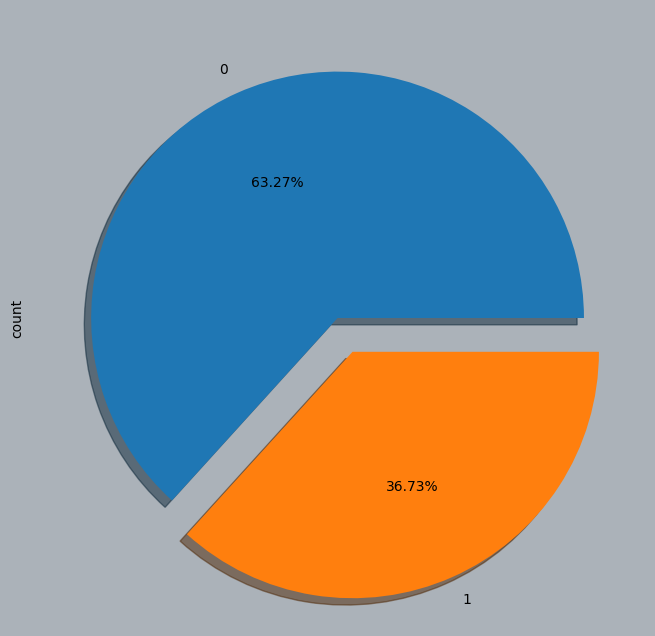

In [47]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);

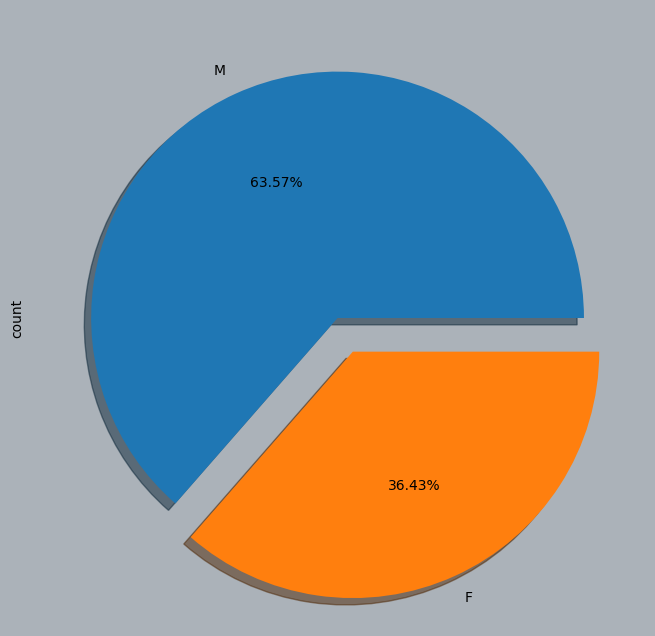

In [60]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);

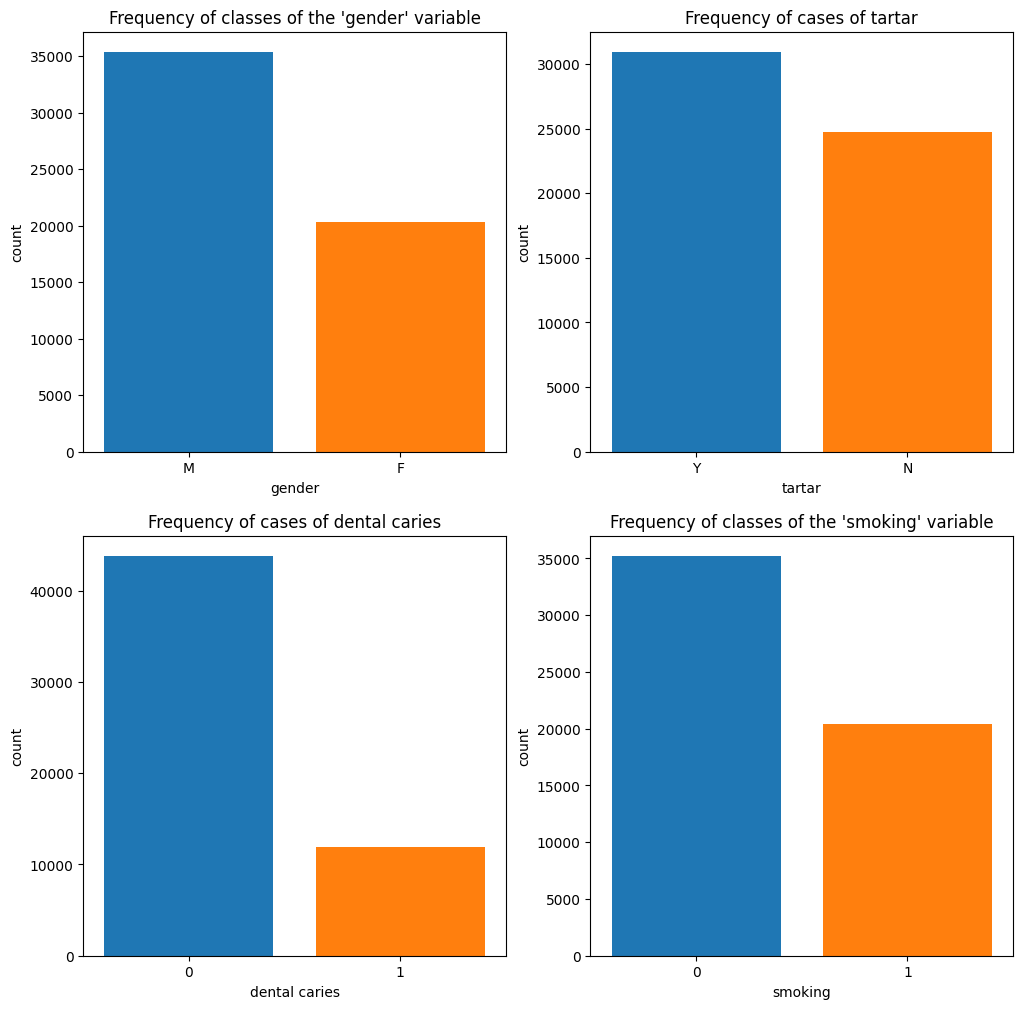

In [46]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["gender"].value_counts().index,
            y = df["gender"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'gender' variable");

sns.barplot(ax = axes[1],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[2],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of dental caries");

sns.barplot(ax = axes[3],
            x = df["smoking"].value_counts().index,
            y = df["smoking"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'smoking' variable");

<Axes: xlabel='smoking', ylabel='count'>

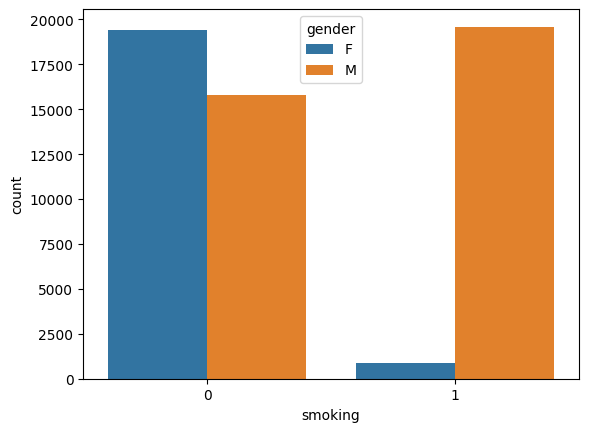

In [49]:
sns.countplot(x = df['smoking'],hue=df['gender'])

<Axes: xlabel='smoking', ylabel='count'>

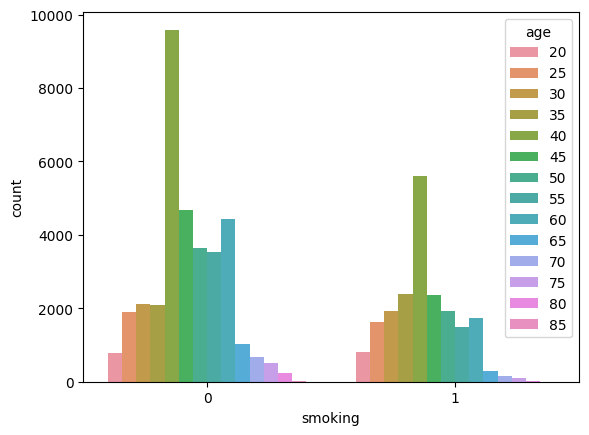

In [50]:
sns.countplot(x = df['smoking'],hue=df['age'])

Text(0.5, 1.0, 'Distribution of Missing values')

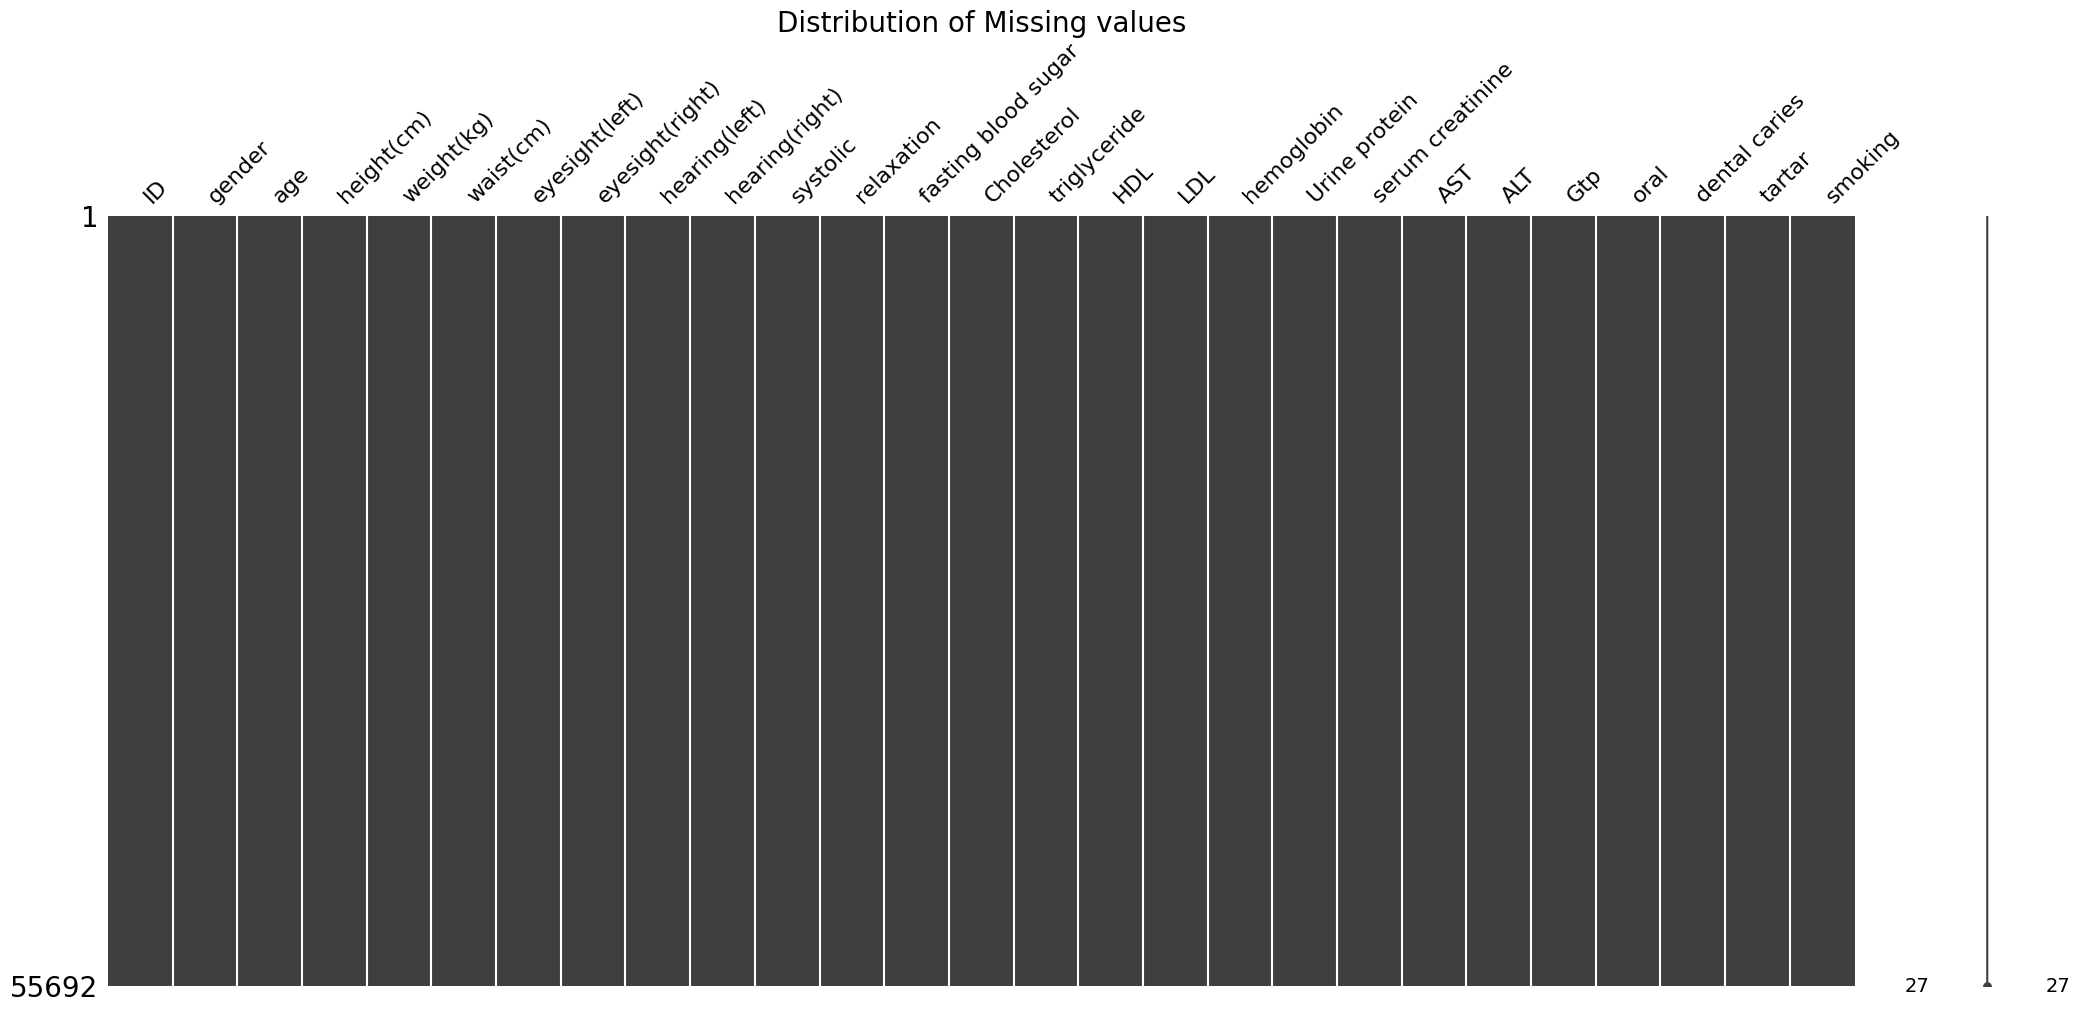

In [56]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)


In [57]:
df = df.drop(['ID'], axis=1)
df = df.drop(['oral'], axis=1)

Text(0.5, 1.0, 'Distribution of Missing values')

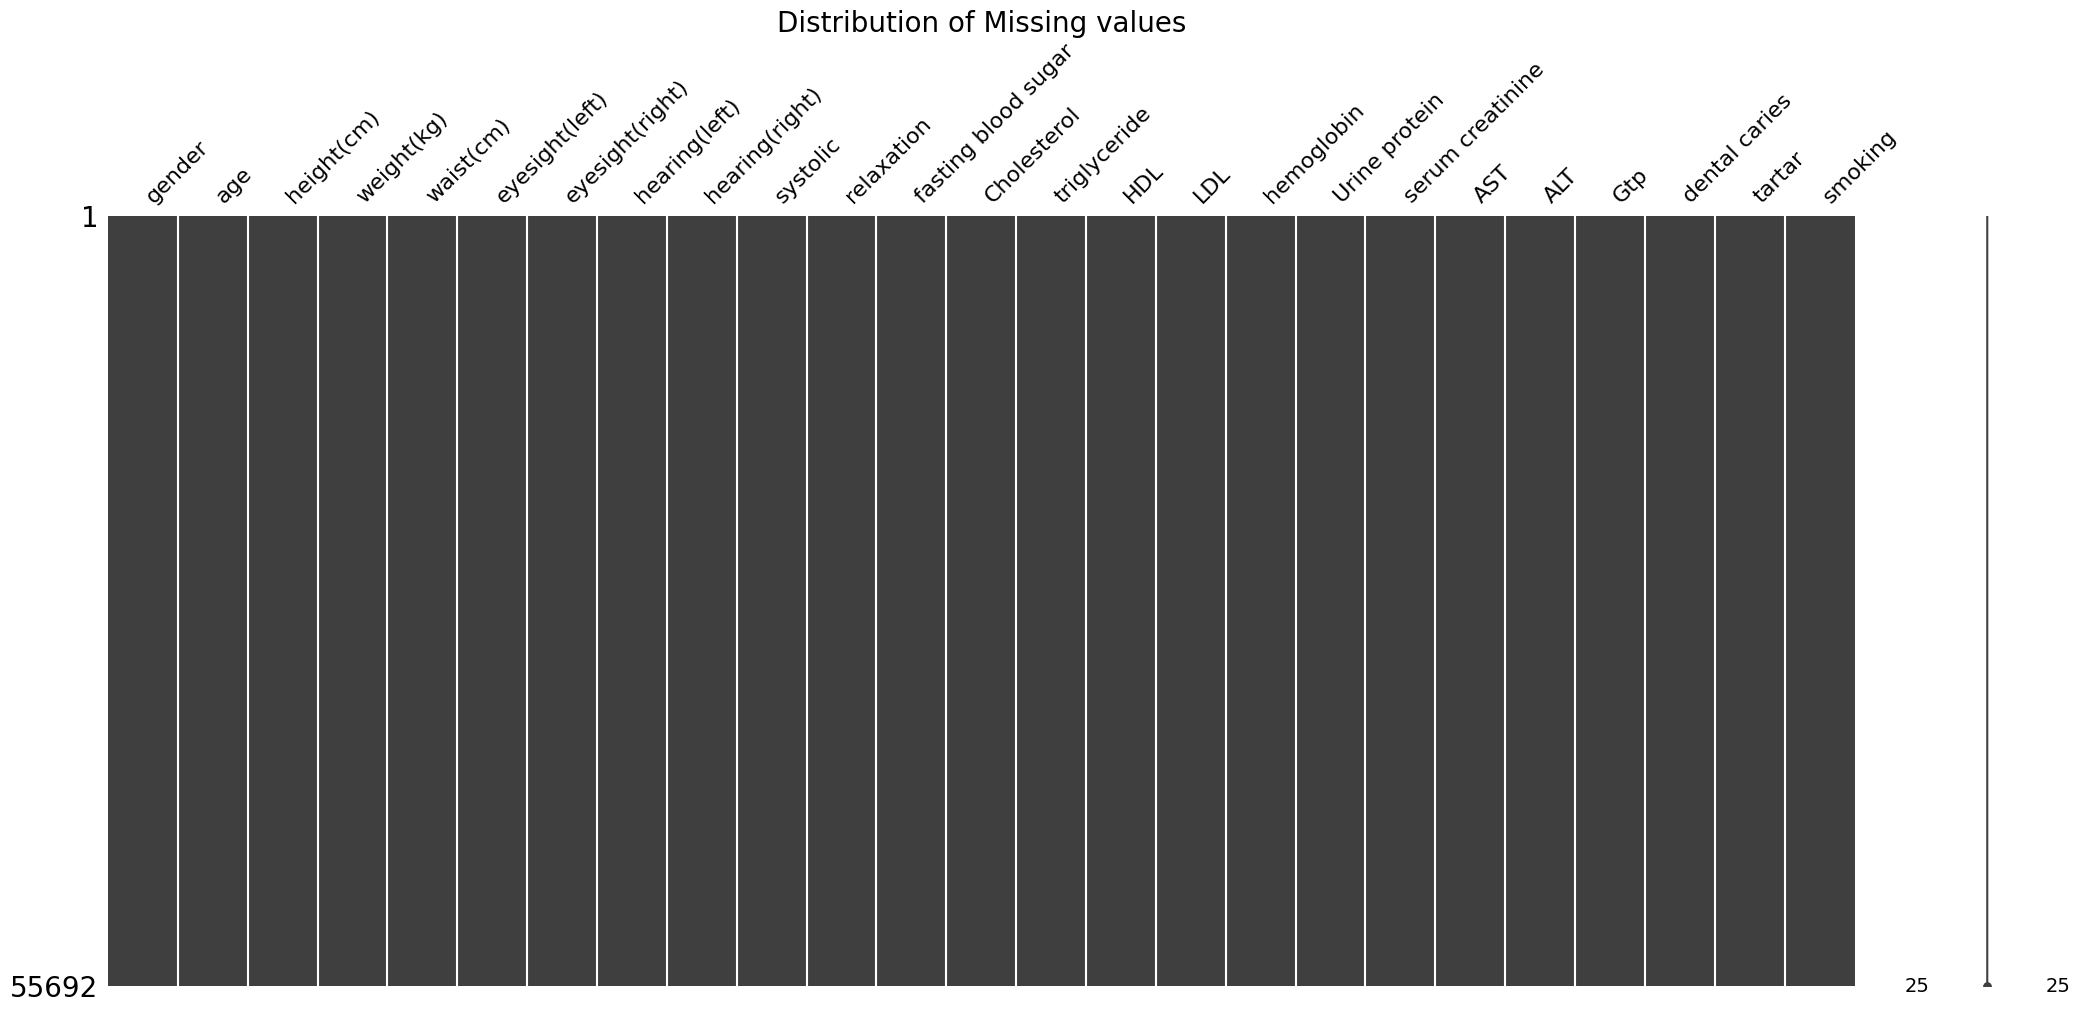

In [13]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)


In [58]:
ONE = OneHotEncoder(handle_unknown='ignore')

def oneHot(df,a):
    cat_encoder = OneHotEncoder()
    ec_cat=cat_encoder.fit_transform(df[[a]])
    return ec_cat.toarray()
df['gender'] = oneHot(df,'gender')
df['tartar'] = oneHot(df,'tartar')

In [59]:
# Buat variabel dummy 
df_dummies = pd.get_dummies(df['Urine protein'], prefix='Urine protein')
# Gabungkan variabel dummy dengan DataFrame asli
df = pd.concat([df, df_dummies], axis=1)

In [60]:
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0     1.0   40         155          60       81.3             1.2   
1     1.0   40         160          60       81.0             0.8   
2     0.0   55         170          60       80.0             0.8   
3     0.0   40         165          70       88.0             1.5   
4     1.0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...   Gtp  \
0              1.0            1.0             1.0     114.0  ...  27.0   
1              0.6            1.0             1.0     119.0  ...  18.0   
2              0.8            1.0             1.0     138.0  ...  22.0   
3              1.5            1.0             1.0     100.0  ...  18.0   
4              1.0            1.0             1.0     120.0  ...  22.0   

   dental caries  tartar  smoking  Urine protein_1.0  Urine protein_2.0  \
0              0     0.0        0               True              False   
1              0     0.0        0               True              False   
2              0     1.0        1               True              False   
3              0     0.0        0               True              False   
4              0     1.0        0               True              False   

   Urine protein_3.0  Urine protein_4.0  Urine protein_5.0  Urine protein_6.0  
0              False              False              False              False  
1              False              False              False              False  
2              False              False              False              False  
3              False              False              False              False  
4              False              False              False              False  

[5 rows x 31 columns]

In [61]:
df = df.drop(['Urine protein'], axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  float64
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

<Axes: >

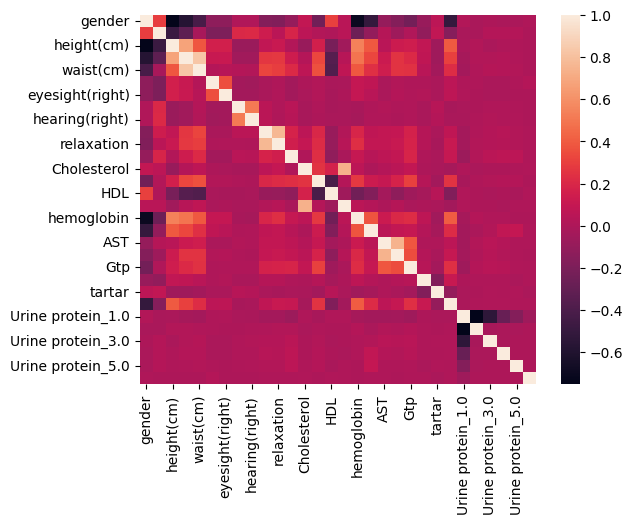

In [72]:
# Checking correlation
sns.heatmap(df.corr())

In [63]:
X = df.drop(columns='smoking',axis=1)
y = df['smoking']

In [96]:
#SPLIT DATA YANG DIGUNAKAN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [97]:
# Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (44553, 29)
y_train : (44553,)
X_test : (11139, 29)
y_test : (11139,)


In [77]:
rf_Model = RandomForestClassifier(random_state=42)

In [78]:
rf = rf_Model.fit(X_train, y_train)

In [79]:
val_preds = rf.predict(X_test)


In [80]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, val_preds)
print(cm1)


Confusion matrix
[[5960 1002]
 [ 832 3345]]


In [82]:

print("\n\nTesting Results:\n")
print(classification_report(y_test, val_preds))



Testing Results:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6962
           1       0.77      0.80      0.78      4177

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



In [83]:
import pickle
with open ('rf_modelstandar.pickle','wb') as f:
 pickle.dump(rf,f)
with open ('rf_modelstandar.pickle','rb') as f:
 modelstandar = pickle.load(f)
modelstandar

RandomForestClassifier(random_state=42)

In [84]:
# Dapatkan feature importance
feature_importance = modelstandar.feature_importances_

# Tampilkan hasil
for i, importance in enumerate(feature_importance):
    print(f"Feature {i + 1}: {importance}")

Feature 1: 0.10933123426201999
Feature 2: 0.03765149603071704
Feature 3: 0.06855140571014189
Feature 4: 0.036096194055907846
Feature 5: 0.04718716201325845
Feature 6: 0.026110496856181175
Feature 7: 0.025904560568679985
Feature 8: 0.0016347777706310661
Feature 9: 0.0016789038728241468
Feature 10: 0.042178790549786946
Feature 11: 0.039954061363877205
Feature 12: 0.04447630100697121
Feature 13: 0.045953823201507135
Feature 14: 0.06332309627290392
Feature 15: 0.045307841488900324
Feature 16: 0.04720000806442685
Feature 17: 0.08396736728035542
Feature 18: 0.033976138483316494
Feature 19: 0.040746325027482745
Feature 20: 0.04588614963281392
Feature 21: 0.08961635529075478
Feature 22: 0.0076520122996133755
Feature 23: 0.00872619130927765
Feature 24: 0.0027542461855051804
Feature 25: 0.0020095713313121972
Feature 26: 0.0014142810504320768
Feature 27: 0.0004992480202166722
Feature 28: 0.0001634085219925918
Feature 29: 4.855247819172083e-05


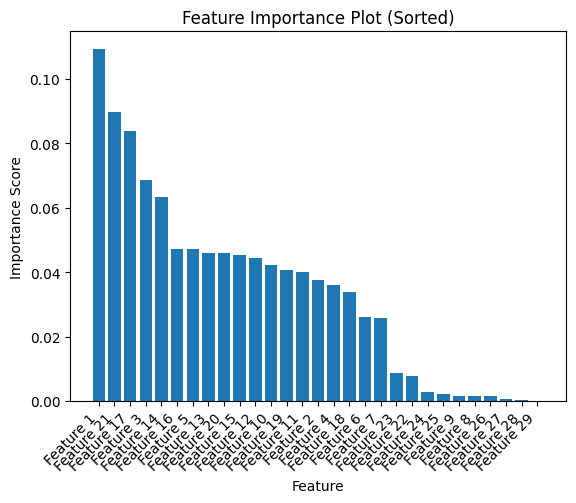

In [85]:
# Ambil nama fitur
feature_names = [f"Feature {i+1}" for i in range(len(feature_importance))]

# Gabungkan nama fitur dan nilai importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Urutkan dictionary berdasarkan nilai importance
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Ambil kembali nama fitur dan nilai importance setelah diurutkan
sorted_feature_names = list(sorted_feature_importance.keys())
sorted_feature_importance_values = list(sorted_feature_importance.values())

# Buat plot bar untuk feature importance yang sudah diurutkan
plt.bar(sorted_feature_names, sorted_feature_importance_values)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Plot (Sorted)')
plt.xticks(rotation=45, ha="right")  # Rotasi label agar lebih mudah dibaca
plt.show()

In [ ]:
#DENGAN SMOTEEN

In [86]:
#DENGAN DATA TARAIN
to_smote = SMOTEENN(sampling_strategy="all",random_state=3)
x_smote, y_smote = to_smote.fit_resample(X_train,y_train)

In [87]:
x_smote.shape
y_smote.shape

(37099,)

In [88]:
rf_Model = RandomForestClassifier( random_state=42)

In [89]:
rf = rf_Model.fit(x_smote, y_smote)

In [90]:
import pickle
with open ('rf_modelsmote.pickle','wb') as f:
 pickle.dump(rf,f)
with open ('rf_modelsmote.pickle','rb') as f:
 modelsmote = pickle.load(f)
modelsmote

RandomForestClassifier(random_state=42)

In [91]:
ypred_tr_smote = rf.predict(x_smote)
ypred_ts_smote = rf.predict(X_test)

In [92]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, ypred_ts_smote)
print(cm1)


Confusion matrix
[[4173 2789]
 [ 232 3945]]


In [93]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_smote, ypred_tr_smote)
print(cm1)


Confusion matrix
[[16038     0]
 [    0 21061]]


In [94]:
print (f'Train Accuracy - : {rf.score(x_smote, y_smote):.2f}')
print (f'Test Accuracy - : {rf.score(X_test,y_test):.2f}')

Train Accuracy - : 1.00
Test Accuracy - : 0.73


In [95]:
print("Training Results:\n")
print(classification_report(y_smote, ypred_tr_smote))
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts_smote))

Training Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16038
           1       1.00      1.00      1.00     21061

    accuracy                           1.00     37099
   macro avg       1.00      1.00      1.00     37099
weighted avg       1.00      1.00      1.00     37099



Testing Results:

              precision    recall  f1-score   support

           0       0.95      0.60      0.73      6962
           1       0.59      0.94      0.72      4177

    accuracy                           0.73     11139
   macro avg       0.77      0.77      0.73     11139
weighted avg       0.81      0.73      0.73     11139



In [ ]:
#PENGUJIAN DATASET DENGAN PERBANDINGAN 90:10

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  float64
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [81]:
#SPLIT DATA YANG DIGUNAKAN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [82]:
# Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (50122, 29)
y_train : (50122,)
X_test : (5570, 29)
y_test : (5570,)


In [84]:
rf_Model = RandomForestClassifier(random_state=42)

In [85]:
model10 = rf_Model.fit(X_train, y_train)

In [87]:
cv = KFold(n_splits = 10, random_state = 116, shuffle=True) 
cv_score = cross_val_score(model10, X_train, y_train, cv=cv) 
cv_score

array([0.83662478, 0.83582685, 0.83519553, 0.83619314, 0.83619314,
       0.82581804, 0.83778931, 0.83280128, 0.82482043, 0.83599362])

In [88]:
mean_accuracy = cv_score.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8337256095046733


In [89]:
print (f'Test Accuracy - : {model10.score(X_test,y_test):.2f}')

Test Accuracy - : 0.85


In [91]:
ypred_ts = model10.predict(X_test)

In [95]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, ypred_ts)
print(cm1)


Confusion matrix
[[2985  452]
 [ 375 1758]]


In [92]:
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts))



Testing Results:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3437
           1       0.80      0.82      0.81      2133

    accuracy                           0.85      5570
   macro avg       0.84      0.85      0.84      5570
weighted avg       0.85      0.85      0.85      5570



In [93]:
auc = roc_auc_score(y_test, ypred_ts)
print('AUC Score :', auc)

AUC Score : 0.8463406210318996


In [64]:
# Buka file pickle dengan mode pembacaan ('rb' untuk membaca sebagai biner)
with open('../input/rfc-model/rf_model10.pickle', 'rb') as file:
    # Gunakan pickle untuk memuat model
    model10 = pickle.load(file)



In [66]:
model_params = model10.get_params()
print("Parameters of the Random Forest model:")
print(model_params)

Parameters of the Random Forest model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [105]:
model10.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [64]:
print(len(rf2.estimators_))

100


In [96]:
fn = ['gender','age','height(cm)','weight(kg)',' waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp','dental caries','tartar','Urine protein_1.0','Urine protein_2.0','Urine protein_3.0','Urine protein_4.0','Urine protein_5.0','Urine protein_6.0']
cn = ['NO', 'YES']

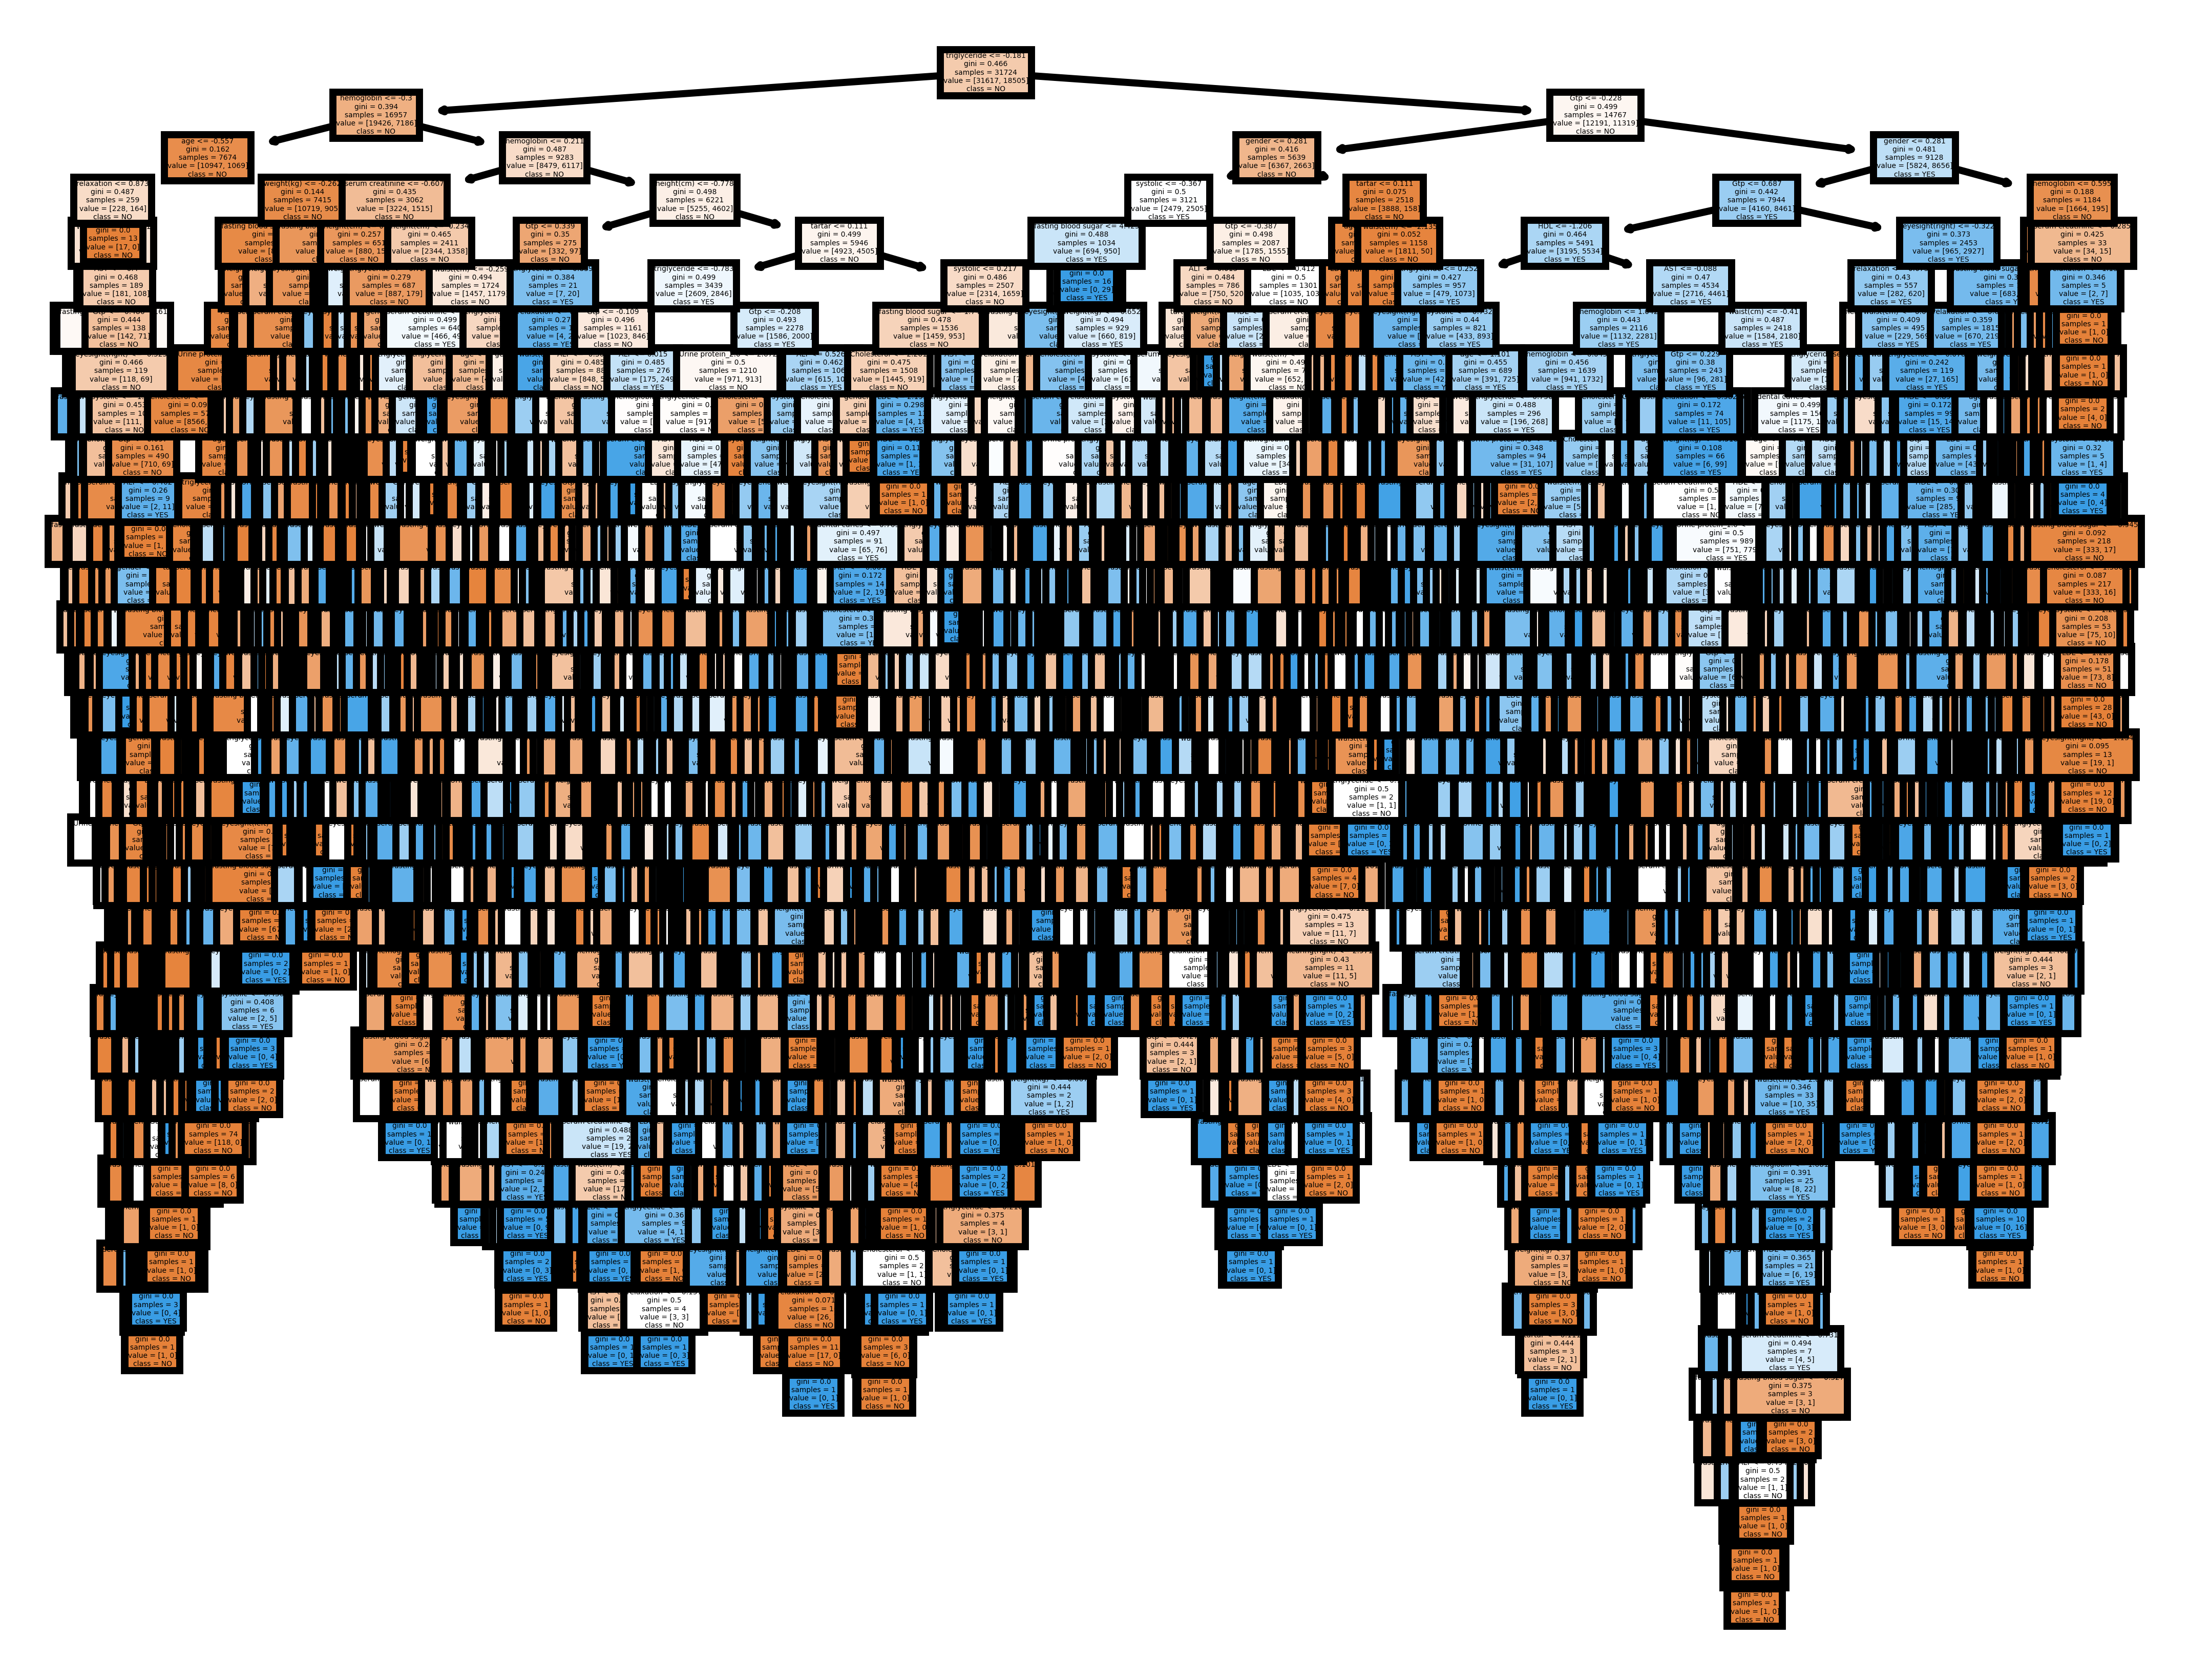

In [97]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=1000)
tree.plot_tree(model10.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);


In [ ]:
fig.savefig('rf_model10_scall.png')

In [99]:
import pickle
with open ('rf_model10_scall.pickle','wb') as f:
 pickle.dump(model10,f)
with open ('rf_model10_scall.pickle','rb') as f:
 model10 = pickle.load(f)
model10

RandomForestClassifier(random_state=42)

In [101]:
#SMOTEENN 90:10

In [102]:
#DENGAN DATA TARAIN
to_smote = SMOTEENN(enn = EditedNearestNeighbours(n_neighbors=3), smote=SMOTE(k_neighbors=5),random_state=1)
x_smote, y_smote = to_smote.fit_resample(X_train,y_train)

In [103]:
smoteenn_params = to_smote.get_params()
print("Parameters of the SMOTEENN model:")
print(smoteenn_params)

Parameters of the SMOTEENN model:
{'enn__kind_sel': 'all', 'enn__n_jobs': None, 'enn__n_neighbors': 3, 'enn__sampling_strategy': 'auto', 'enn': EditedNearestNeighbours(), 'n_jobs': None, 'random_state': 1, 'sampling_strategy': 'auto', 'smote__k_neighbors': 5, 'smote__n_jobs': None, 'smote__random_state': None, 'smote__sampling_strategy': 'auto', 'smote': SMOTE()}


In [104]:
x_smote.shape
y_smote.shape

(55855,)

In [105]:
rf_Model = RandomForestClassifier( random_state=42)

In [106]:
modelsmote10 = rf_Model.fit(x_smote, y_smote)

In [107]:
cv = KFold(n_splits = 10, random_state = 116, shuffle=True) 
cv_score = cross_val_score(modelsmote10, x_smote, y_smote, cv=cv) 
cv_score


array([0.91049051, 0.90673111, 0.90655209, 0.90601504, 0.90511994,
       0.90599821, 0.90689346, 0.90599821, 0.90116383, 0.91047449])

In [108]:
mean_accuracy = cv_score.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9065436900859389


In [109]:
ypred_ts_smote = modelsmote10.predict(X_test)

In [110]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, ypred_ts_smote)
print(cm1)


Confusion matrix
[[3074  363]
 [ 726 1407]]


In [112]:
print (f'Test Accuracy - : {modelsmote10.score(X_test,y_test):.2f}')

Test Accuracy - : 0.80


In [113]:
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts_smote))



Testing Results:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3437
           1       0.79      0.66      0.72      2133

    accuracy                           0.80      5570
   macro avg       0.80      0.78      0.79      5570
weighted avg       0.80      0.80      0.80      5570



In [114]:
auc = roc_auc_score(y_test, ypred_ts_smote)
print('AUC Score :', auc)

AUC Score : 0.7770094778138296


In [115]:
fn = ['gender','age','height(cm)','weight(kg)',' waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp','dental caries','tartar','Urine protein_1.0','Urine protein_2.0','Urine protein_3.0','Urine protein_4.0','Urine protein_5.0','Urine protein_6.0']
cn = ['NO', 'YES']

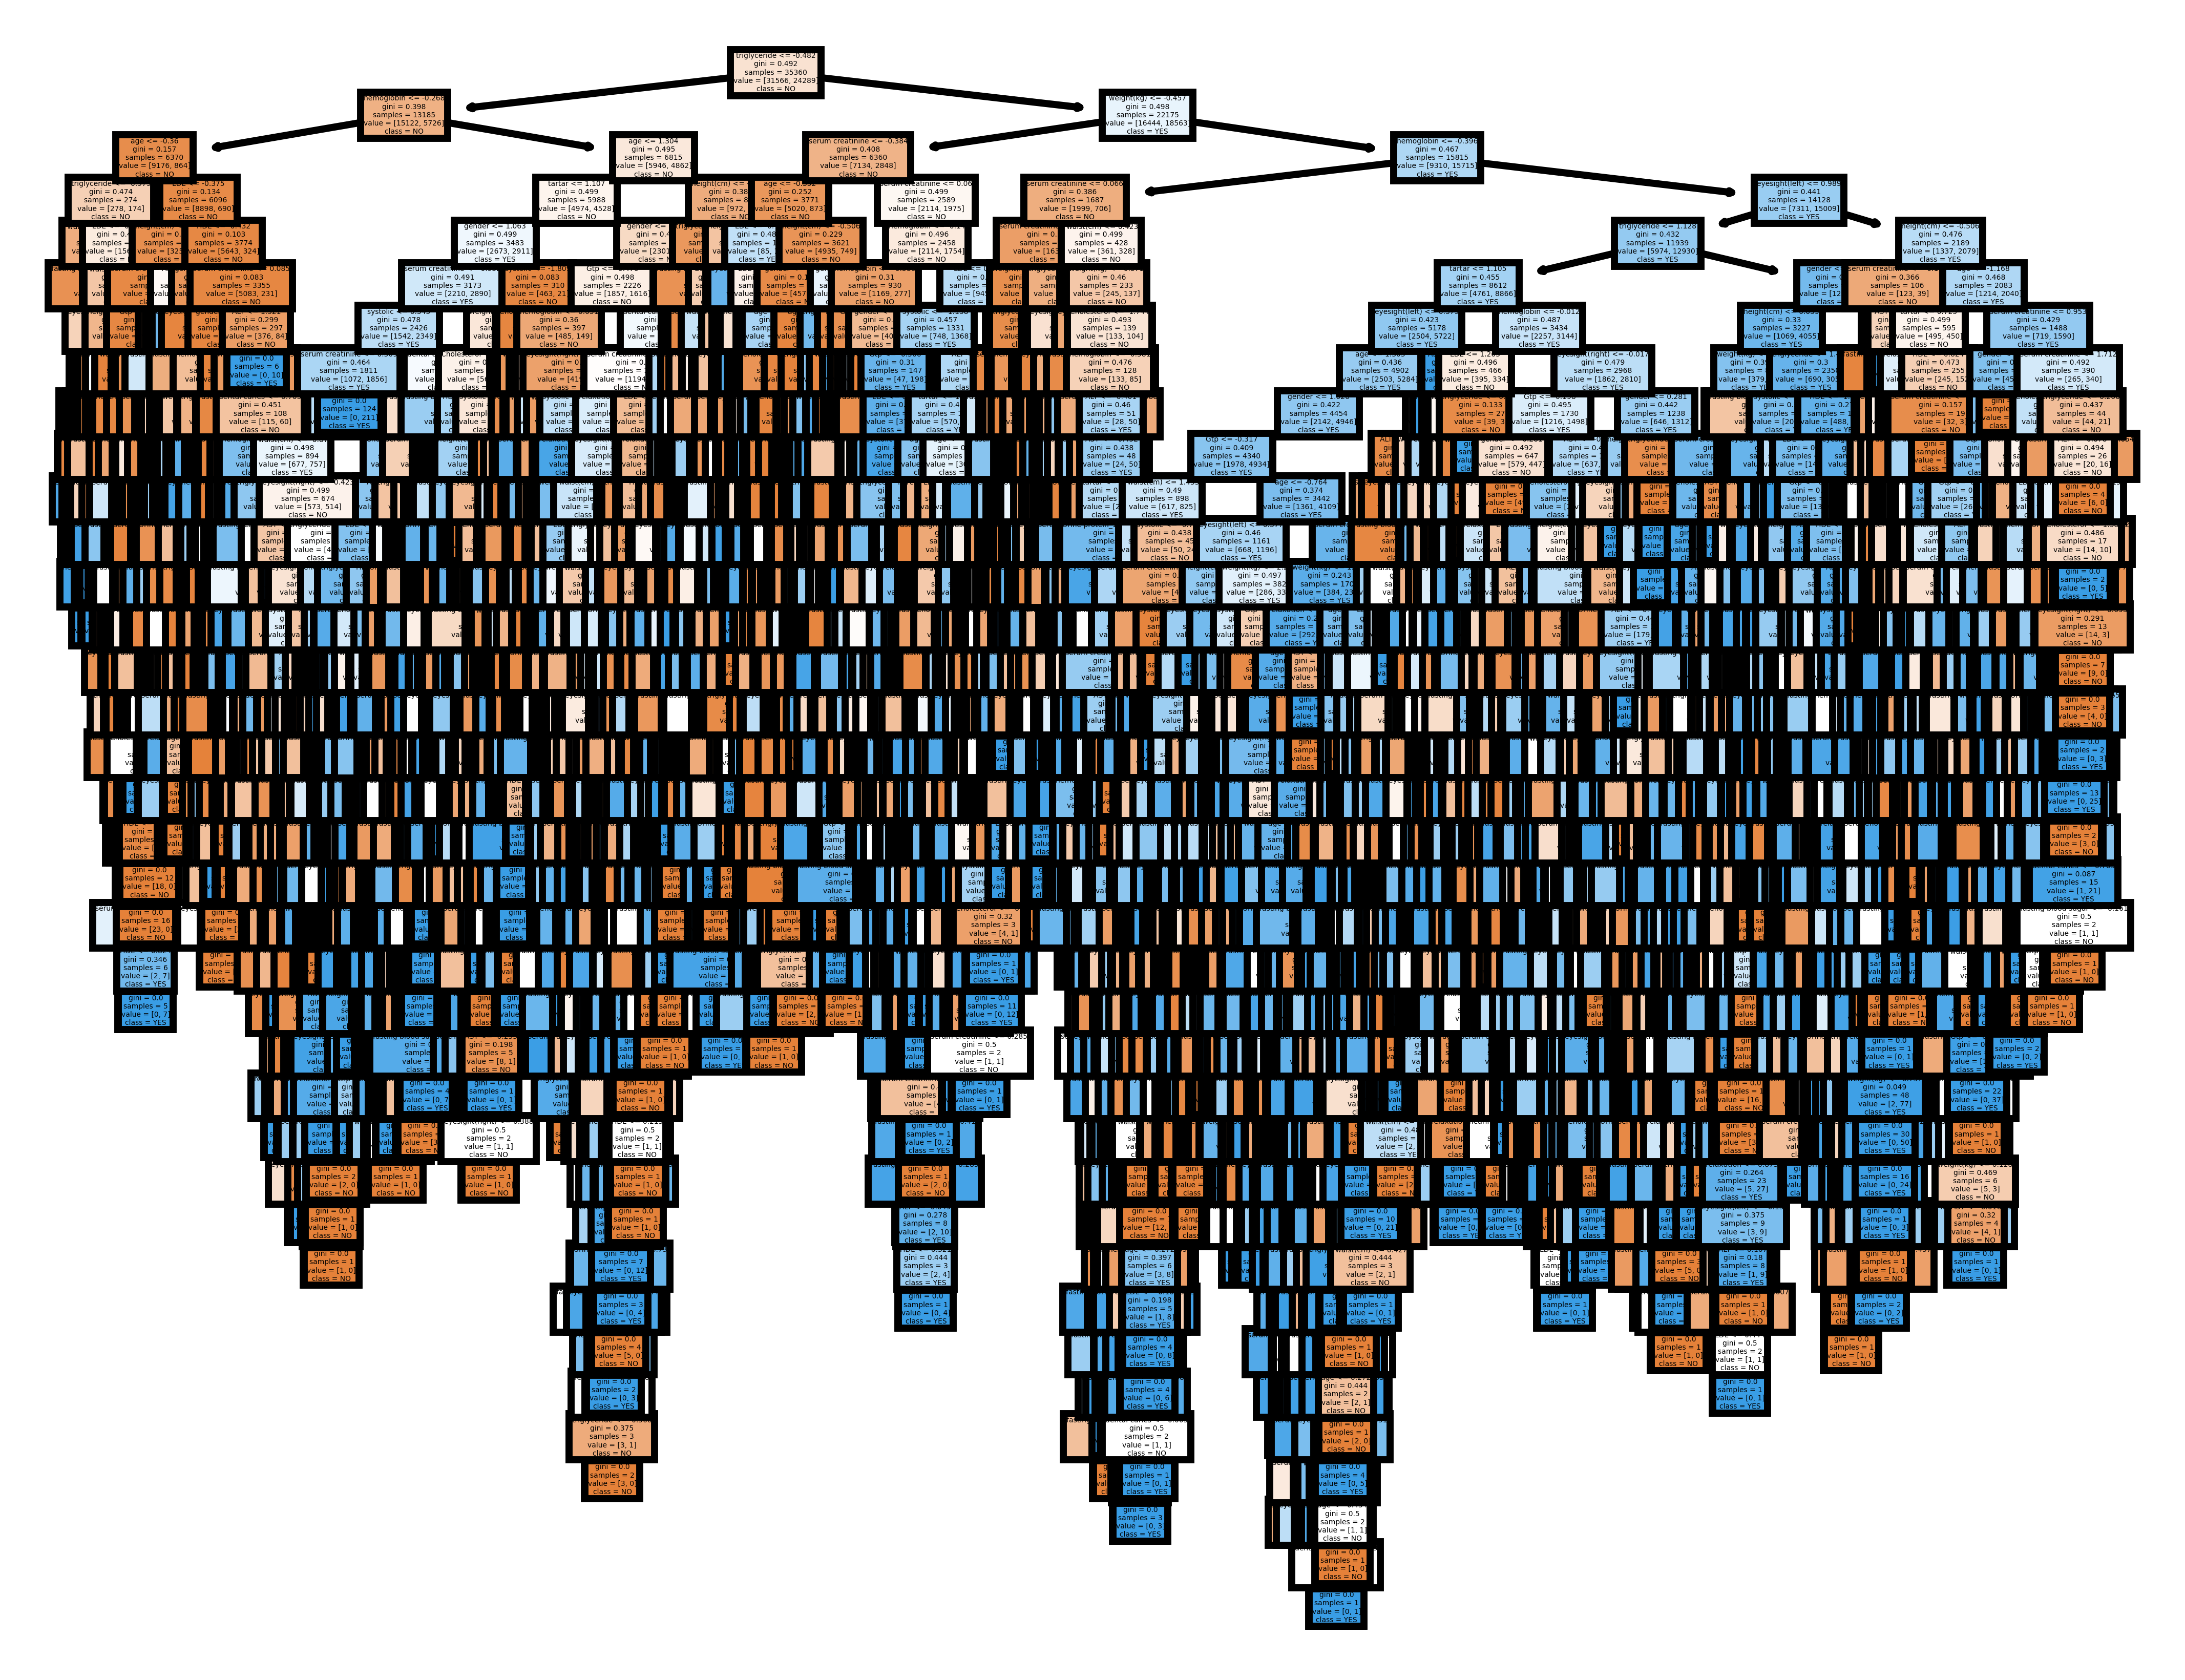

In [118]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=1000)
tree.plot_tree(modelsmote10.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);

In [119]:
fig.savefig('rf_modelsmote10_scall.png')

In [67]:

# Buka file pickle dengan mode pembacaan ('rb' untuk membaca sebagai biner)
with open('../input/rfc-model/rf_modelsmote10.pickle', 'rb') as file:
    # Gunakan pickle untuk memuat model
    modelsmote10 = pickle.load(file)


In [120]:
import pickle
with open ('rf_modelsmote10_scall.pickle','wb') as f:
 pickle.dump(modelsmote10,f)


In [68]:
model_params = modelsmote10.get_params()
print("Parameters of the Random Forest model:")
print(model_params)

Parameters of the Random Forest model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [64]:
#SPLIT DATA YANG DIGUNAKAN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [65]:
X_train.shape
y_train.shape

(50122,)

In [12]:
# Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#coba
#DENGAN DATA TARAIN
to_smote = SMOTEENN(sampling_strategy='auto',random_state=12)
x_smote, y_smote = to_smote.fit_resample(X_train,y_train)

In [73]:
to_smote = SMOTEENN(enn = EditedNearestNeighbours(n_neighbors=3), smote=SMOTE(k_neighbors=5),random_state=1)
x_smote, y_smote = to_smote.fit_resample(X_train,y_train)

In [79]:
smoteenn_params = to_smote.get_params()
print("Parameters of the SMOTEENN model:")
print(smoteenn_params)

Parameters of the SMOTEENN model:
{'enn__kind_sel': 'all', 'enn__n_jobs': None, 'enn__n_neighbors': 3, 'enn__sampling_strategy': 'auto', 'enn': EditedNearestNeighbours(), 'n_jobs': None, 'random_state': 1, 'sampling_strategy': 'auto', 'smote__k_neighbors': 5, 'smote__n_jobs': None, 'smote__random_state': None, 'smote__sampling_strategy': 'auto', 'smote': SMOTE()}


In [74]:
x_smote.shape
y_smote.shape

(54914,)

In [75]:
rf_Model = RandomForestClassifier( random_state=2)
modelsmote10 = rf_Model.fit(x_smote, y_smote)

In [76]:
cv = KFold(n_splits = 10, random_state = 16, shuffle=True) 
cv_score = cross_val_score(modelsmote10, x_smote, y_smote, cv=cv) 
cv_score

array([0.91569556, 0.90914057, 0.90932265, 0.91351056, 0.91495174,
       0.90821344, 0.91149153, 0.90839556, 0.91841195, 0.91313058])

In [77]:
print('\nConfusion matrix')
ypred_ts_smote = modelsmote10.predict(X_test)
cm1 = confusion_matrix(y_test, ypred_ts_smote)
print(cm1)


Confusion matrix
[[3155  282]
 [ 847 1286]]


In [78]:
print("\n\nTesting Results:\n")
print(classification_report(y_test, ypred_ts_smote))



Testing Results:

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3437
           1       0.82      0.60      0.69      2133

    accuracy                           0.80      5570
   macro avg       0.80      0.76      0.77      5570
weighted avg       0.80      0.80      0.79      5570



In [117]:
#HYPERPARAMETRIK
#SPLIT DATA YANG DIGUNAKAN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [118]:
# Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Number of trees in random forest

n_estimators = [200,400,600]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [20,30,40]
# Minimum number of samples required to split a node
min_samples_split = [ 2, 4, 6, 8 ]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2,3,4,5]


In [114]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}
print(param_grid)

{'n_estimators': [200, 400, 600], 'max_features': ['sqrt', 'log2'], 'max_depth': [20, 30, 40], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 3, 4, 5]}


In [115]:
rf_Model = RandomForestClassifier(random_state=42)

In [116]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs=3)

In [119]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  46.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.1min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  21.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=  46.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 1.2min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=  23.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=  44.2s
[CV] END max_depth=20, max_features=sqrt

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'max_depth': [20, 30, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200, 400, 600]},
             verbose=2)

In [120]:
rf_Grid.best_params_

{'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [121]:
rf_Model_best = RandomForestClassifier(n_estimators=600,  max_depth=40, max_features='log2', min_samples_leaf=2, min_samples_split= 2)

In [122]:
rf_Model_best.fit(X_train, y_train)

[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=  54.4s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=  18.8s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=  36.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=  56.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=  17.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=  35.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  53.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=  18.0s
[CV] END max_depth=40, max_features=log2

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=2,
                       n_estimators=600)

In [36]:
rf_Model_best.estimators_

[DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=13880158),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=99120853),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=759990128),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=2146564109),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=297007947),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=2079448386),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        random_state=2037566435),
 DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                        

In [123]:
print (f'Train Accuracy - : {rf_Model_best.score(X_train,y_train):.2f}')
print (f'Test Accuracy - : {rf_Model_best.score(X_test,y_test):.2f}')

Train Accuracy - : 0.99
Test Accuracy - : 0.84


In [124]:
val_preds = rf_Model_best.predict(X_test)

In [125]:
print('\nConfusion matrix')
cm1 = confusion_matrix(y_test, val_preds)
print(cm1)


Confusion matrix
[[5959 1003]
 [ 833 3344]]


In [126]:
print('\nClassification report')
cr1 = classification_report(y_test, val_preds)
print(cr1)


Classification report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6962
           1       0.77      0.80      0.78      4177

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



In [127]:
import pickle
with open ('rf_modeltuning.pickle','wb') as f:
 pickle.dump(rf_Model_best,f)
with open ('rf_modeltuning.pickle','rb') as f:
 model = pickle.load(f)
model

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=2,
                       n_estimators=600)

In [4]:
#untuk import model
# Buka file pickle dengan mode pembacaan ('rb' untuk membaca sebagai biner)
with open('../input/smoking-model/rf_modeltuning.pickle', 'rb') as file:
    # Gunakan pickle untuk memuat model
    modeltuning = pickle.load(file)



In [5]:
fn = ['gender','age','height(cm)','weight(kg)',' waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp','dental caries','tartar','Urine protein_1.0','Urine protein_2.0','Urine protein_3.0','Urine protein_4.0','Urine protein_5.0','Urine protein_6.0']
cn = ['NO', 'YES']

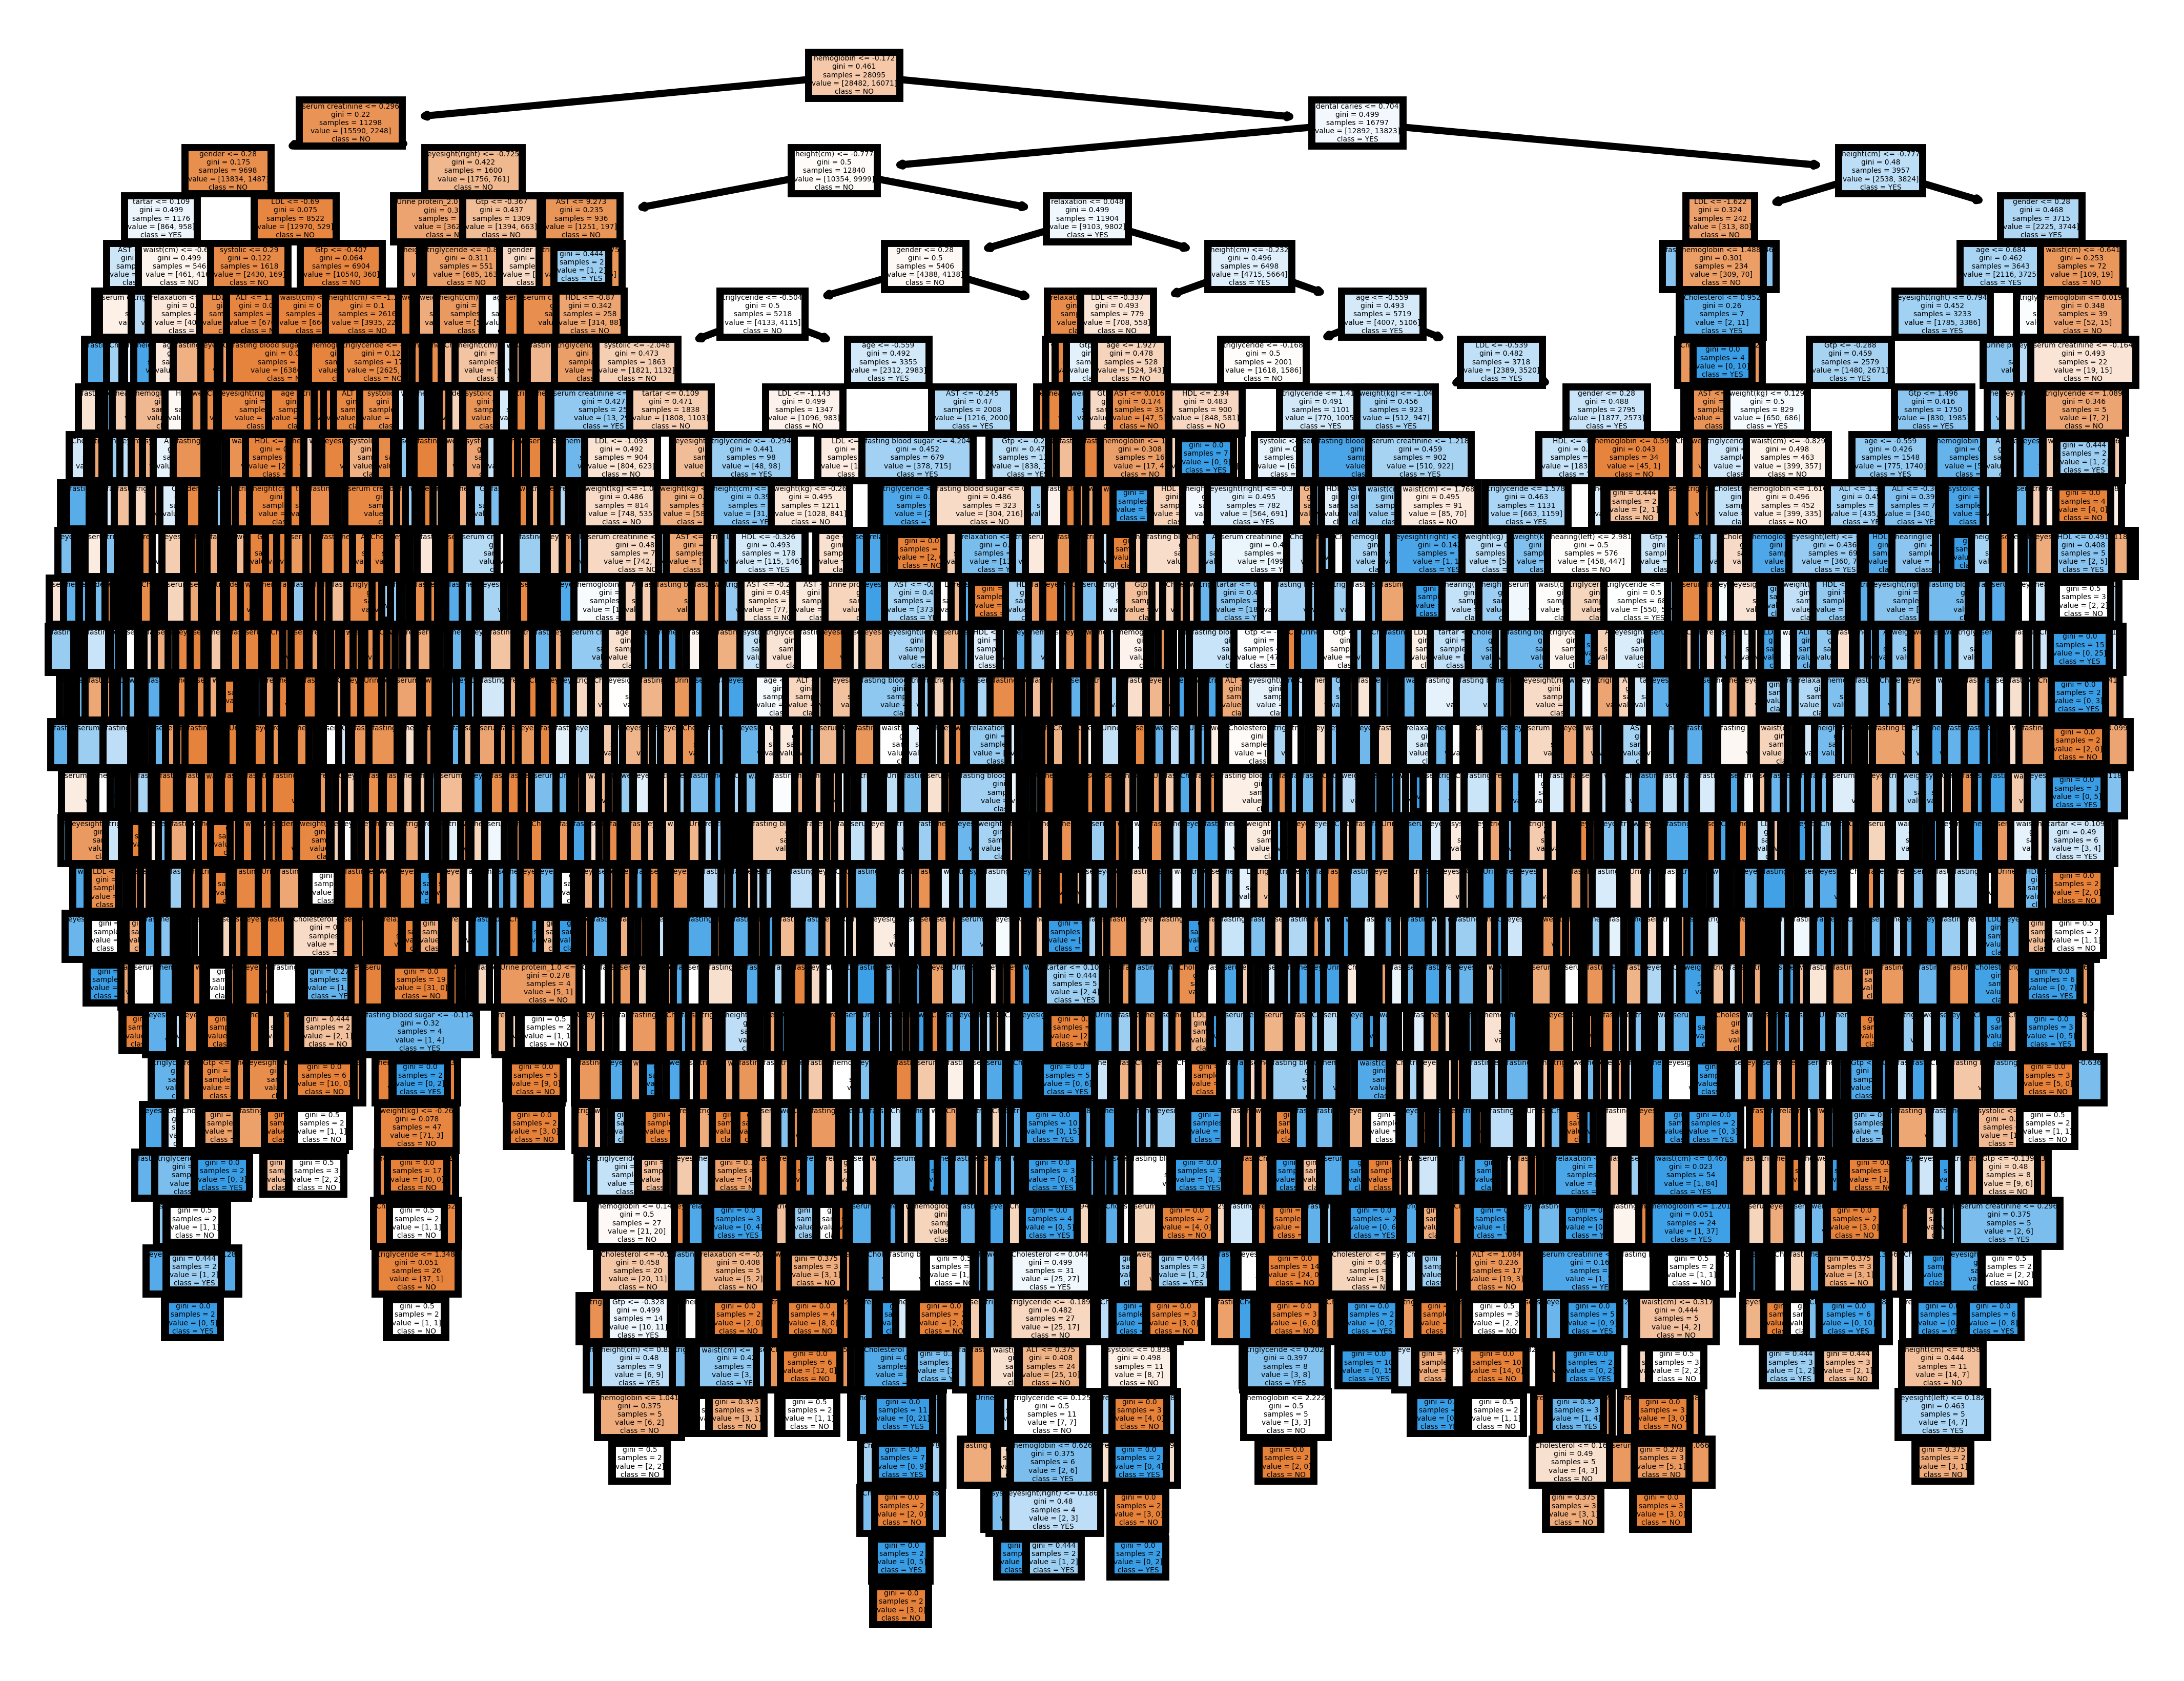

In [7]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=1000)
tree.plot_tree(modeltuning.estimators_[100],
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#valiadari 

In [83]:
#untuk import model
# Buka file pickle dengan mode pembacaan ('rb' untuk membaca sebagai biner)
with open('../input/smoking-model/rf_model10.pickle', 'rb') as file:
    # Gunakan pickle untuk memuat model
    model = pickle.load(file)



In [62]:
x_train = pd.read_csv('../input/dataset-smoking/x_train.csv')
y_train = pd.read_csv('../input/dataset-smoking/y_train.csv')

In [66]:
ONE = OneHotEncoder(handle_unknown='ignore')

def oneHot(x_train,a):
    cat_encoder = OneHotEncoder()
    ec_cat=cat_encoder.fit_transform(x_train[[a]])
    return ec_cat.toarray()
x_train['gender'] = oneHot(x_train,'gender')
x_train['tartar'] = oneHot(x_train,'tartar')

In [67]:
# Buat variabel dummy 
df_dummies = pd.get_dummies(x_train['Urine protein'], prefix='Urine protein')
# Gabungkan variabel dummy dengan DataFrame asli
x_train = pd.concat([x_train, df_dummies], axis=1)

In [68]:
x_train.head()

ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0     1.0   40         155          60       81.3             1.2   
1   1     1.0   40         160          60       81.0             0.8   
2   2     0.0   55         170          60       80.0             0.8   
3   3     0.0   40         165          70       88.0             1.5   
4   4     1.0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...   Gtp  oral  \
0              1.0            1.0             1.0  ...  27.0     Y   
1              0.6            1.0             1.0  ...  18.0     Y   
2              0.8            1.0             1.0  ...  22.0     Y   
3              1.5            1.0             1.0  ...  18.0     Y   
4              1.0            1.0             1.0  ...  22.0     Y   

   dental caries  tartar  Urine protein_1.0  Urine protein_2.0  \
0            0.0     0.0               True              False   
1            0.0     0.0               True              False   
2            0.0     1.0               True              False   
3            0.0     0.0               True              False   
4            0.0     1.0               True              False   

   Urine protein_3.0  Urine protein_4.0  Urine protein_5.0  Urine protein_6.0  
0              False              False              False              False  
1              False              False              False              False  
2              False              False              False              False  
3              False              False              False              False  
4              False              False              False              False  

[5 rows x 32 columns]

In [ ]:
x_train = x_train.drop(['ID'], axis=1)
x_train = x_train.drop(['oral'], axis=1)
x_train = x_train.drop(['Urine protein'], axis=1)


In [71]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44553 non-null  float64
 1   age                  44553 non-null  int64  
 2   height(cm)           44553 non-null  int64  
 3   weight(kg)           44553 non-null  int64  
 4   waist(cm)            44553 non-null  float64
 5   eyesight(left)       44553 non-null  float64
 6   eyesight(right)      44553 non-null  float64
 7   hearing(left)        44553 non-null  float64
 8   hearing(right)       44553 non-null  float64
 9   systolic             44553 non-null  float64
 10  relaxation           44553 non-null  float64
 11  fasting blood sugar  44553 non-null  float64
 12  Cholesterol          44553 non-null  float64
 13  triglyceride         44553 non-null  float64
 14  HDL                  44553 non-null  float64
 15  LDL                  44553 non-null 

In [79]:
y_train = y_train.drop(['ID'], axis=1)

In [80]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   smoking  44553 non-null  int64
dtypes: int64(1)
memory usage: 348.2 KB


In [86]:
# Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(x_train)


In [87]:
val_preds = model.predict(x_train)

In [88]:
print("\n\nTesting Results:\n")
print(classification_report(y_train, val_preds))



Testing Results:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28201
           1       0.97      0.98      0.98     16352

    accuracy                           0.98     44553
   macro avg       0.98      0.98      0.98     44553
weighted avg       0.98      0.98      0.98     44553

